# Exploring Distributions with Movies Data 

- onl01-dtsc-ft-022221
- 03/25/21

## Learning Objectives

- To relate the concepts of distributions and normality back to data we are familiar with.
- To discuss outliers, ways to detect them and remove them.
- To discuss Z-scores and the ways we can calculate them.
- To discuss normality and how to asses it


## Announcements

- [ ] Changes to Central Lecturer Recording format (good news!)
- [ ] Study Group Time Shift Poll
- Will return to probability questions next Friday when we cover Topic 17 (another probably-question-heavy topic)

### Questions

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('seaborn-talk')

In [104]:
df = pd.read_csv('joined_movie_data_for_sg.csv')
display(df.head())
df.info()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,revenue-domestic,revenue-worldwide,lost_money,roi-domestic,roi-worldwide,release_month
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.00,"Action,Adventure,Fantasy","-169,536,125.00","635,063,875.00",True,-41.29,154.67,5
1,3,2019-06-07,Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.00,"Action,Adventure,Sci-Fi","-307,237,650.00","-200,237,650.00",True,-87.78,-57.21,6
2,4,2015-05-01,Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi","128,405,868.00","1,072,413,963.00",False,38.84,324.38,5
3,7,2018-04-27,Avengers: Infinity War,"300,000,000.00","678,815,482.00","2,048,134,200.00",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi","378,815,482.00","1,748,134,200.00",False,126.27,582.71,4
4,9,2017-11-17,Justice League,"300,000,000.00","229,024,295.00","655,945,209.00",tt0974015,Justice League,Justice League,2017,120.00,"Action,Adventure,Fantasy","-70,975,705.00","355,945,209.00",True,-23.66,118.65,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3467 non-null   int64  
 1   release_date       3467 non-null   object 
 2   movie              3467 non-null   object 
 3   production_budget  3467 non-null   float64
 4   domestic_gross     3467 non-null   float64
 5   worldwide_gross    3467 non-null   float64
 6   tconst             3467 non-null   object 
 7   primary_title      3467 non-null   object 
 8   original_title     3467 non-null   object 
 9   start_year         3467 non-null   int64  
 10  runtime_minutes    3056 non-null   float64
 11  genres             3467 non-null   object 
 12  revenue-domestic   3467 non-null   float64
 13  revenue-worldwide  3467 non-null   float64
 14  lost_money         3467 non-null   bool   
 15  roi-domestic       3467 non-null   float64
 16  roi-worldwide      3467 

## Visualizing Distributions

In [105]:
data = df['domestic_gross'].copy()
data

0      241,063,875.00
1       42,762,350.00
2      459,005,868.00
3      678,815,482.00
4      229,024,295.00
            ...      
3462       138,711.00
3463        94,596.00
3464         4,584.00
3465             0.00
3466             0.00
Name: domestic_gross, Length: 3467, dtype: float64

> - I want to visualize the distribution of domestic gross. 
    - Q: What types of plots do I have that let me do so?

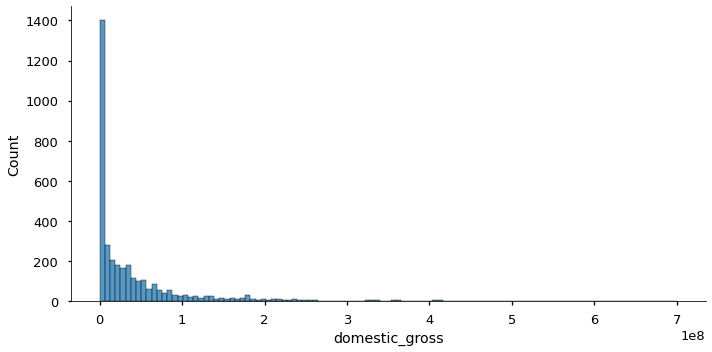

In [106]:
## Histogram - Counts
ax = sns.displot(data,kind='hist',aspect=2)

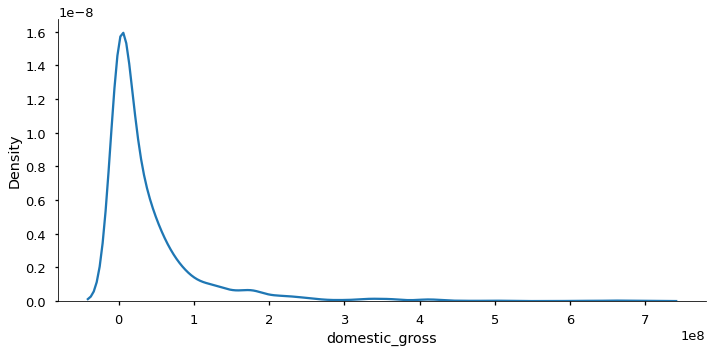

In [107]:
## Histogram - Density
ax = sns.displot(data,aspect=2,kind='kde')

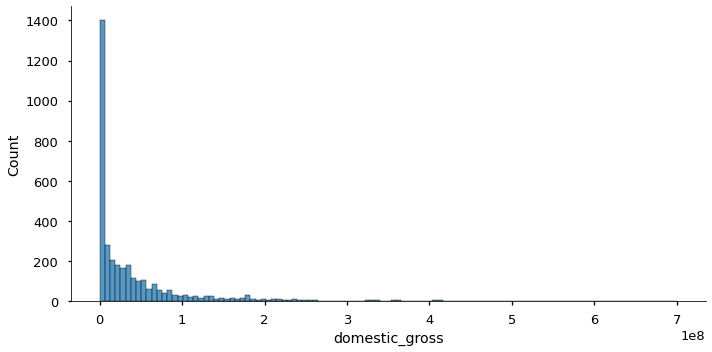

In [108]:
sns.displot(data=df, x='domestic_gross',aspect=2)

### Median vs Mean

In [109]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

data.describe()

count         3,467.00
mean     40,025,881.00
std      69,628,617.27
min               0.00
25%         373,375.00
50%      14,218,868.00
75%      48,265,581.00
max     700,059,566.00
Name: domestic_gross, dtype: float64

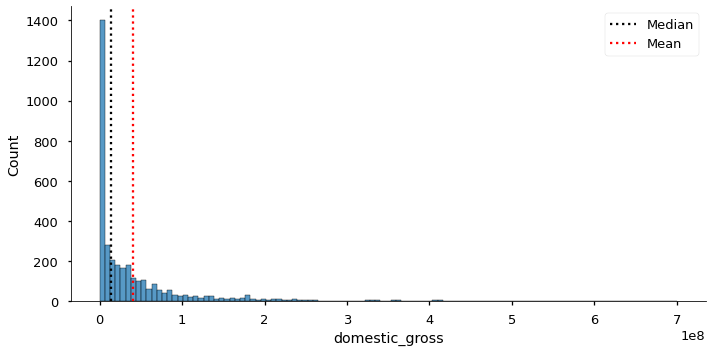

In [110]:
g = sns.displot(data=df,x='domestic_gross',aspect=2,kind='hist')
g.ax.axvline(df['domestic_gross'].median(), color='black',ls=':', label='Median')
g.ax.axvline(df['domestic_gross'].mean(), color='red',ls=':', label='Mean')
g.ax.legend()

### Skew and Kurtosis

In [111]:
from scipy.stats import kurtosis, skew,normaltest

In [112]:
skew(data, bias=False)

3.7369306147518566

In [113]:
kurtosis(data, bias=False)

19.964490781294813

#### Compare that revenue-domestic

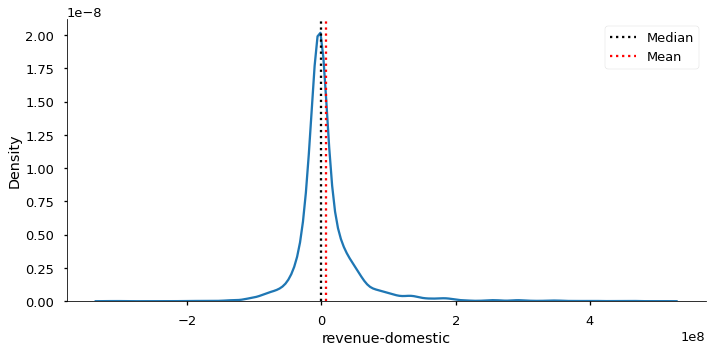

In [114]:
g = sns.displot(data=df,x='revenue-domestic',aspect=2,kind='kde')
g.ax.axvline(df['revenue-domestic'].median(), color='black',ls=':', label='Median')
g.ax.axvline(df['revenue-domestic'].mean(), color='red',ls=':', label='Mean')
g.ax.legend()

In [115]:
skew(df['revenue-domestic'], bias=False)

3.094125271540967

In [116]:
kurtosis(df['revenue-domestic'], bias=False)

20.182936218192015

In [117]:
def plot_distribution(df_,col='domestic_gross'):
    ## Copy Data, Calc stats
    df = df_.copy()
    
    ## mean/median
    median = df[col].median()
    mean = df[col].mean()    
    ## skew/kurt
    skew_val = skew(df[col], bias=False)
    kurt_val = kurtosis(df[col], bias=False)
    
    
    fig, ax = plt.subplots(figsize=(10,8), nrows=2)
    
    sns.histplot(df[col],ax=ax[0])
    ax[0].axvline(median, color='black',ls=':', label=f'Median={round(median,2):,}')
    ax[0].axvline(mean, color='red',ls=':', label=f'Mean={round(mean,2):,}')
    ax[0].legend()
    ax[0].set_title(f"Distribution of {col}")
    
    
    sns.boxplot(data=df, x=col)
    
    
    fig.tight_layout()
    plt.show()
    ## Print the skew and kurtosis
    print(f"Skew = {round(skew_val,2)}")
    print(f"Kurtosis = {round(kurt_val,2)}")
    
    return fig, ax

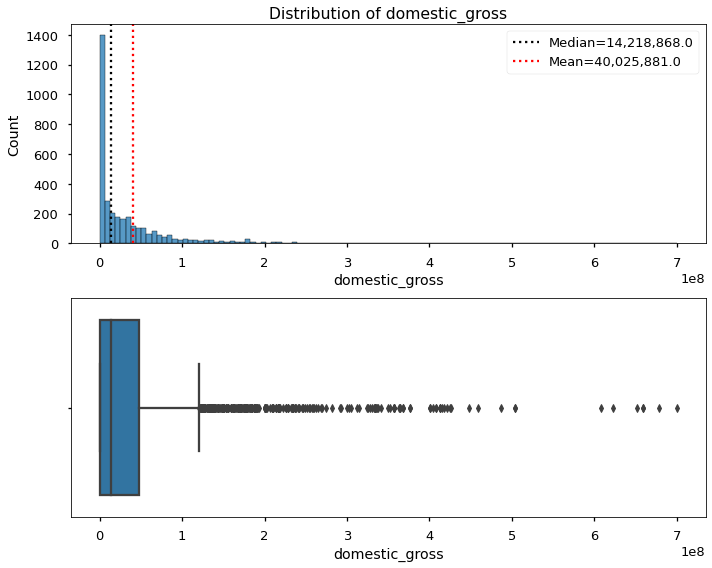

Skew = 3.74
Kurtosis = 19.96


In [118]:
fig,ax = plot_distribution(df,)

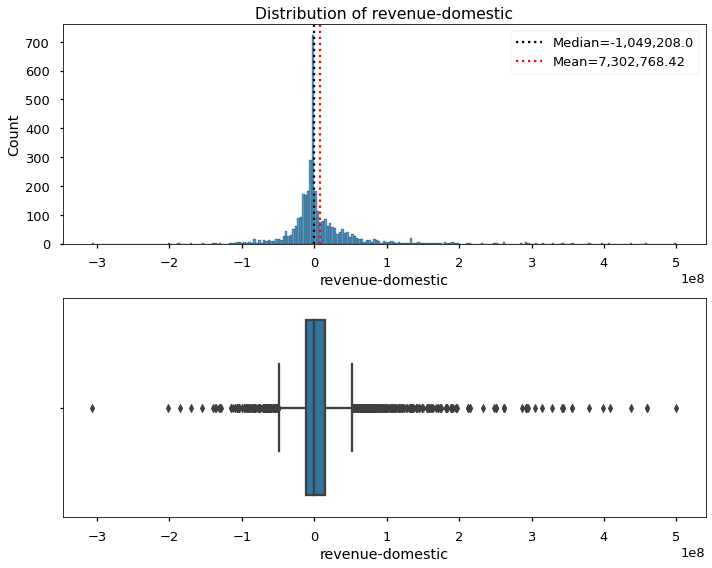

Skew = 3.09
Kurtosis = 20.18


In [119]:
fig,ax = plot_distribution(df,col='revenue-domestic')

## Z-Scores

In [120]:
from scipy import stats

In [140]:
## Calculate Z-Scores with Scipy

cols = ['worldwide_gross','domestic_gross','revenue-domestic','revenue-worldwide']
outlier_df = df[cols].copy()
for col in cols:
    outlier_df[f"{col}_Z"] = stats.zscore(df[col])
outlier_df.head()

,worldwide_gross,domestic_gross,revenue-domestic,revenue-worldwide,worldwide_gross_Z,domestic_gross_Z,revenue-domestic_Z,revenue-worldwide_Z
0,"1,045,663,875.00","241,063,875.00","-169,536,125.00","635,063,875.00",5.11,2.89,-3.55,3.70
1,"149,762,350.00","42,762,350.00","-307,237,650.00","-200,237,650.00",0.30,0.04,-6.32,-1.69
2,"1,403,013,963.00","459,005,868.00","128,405,868.00","1,072,413,963.00",7.03,6.02,2.43,6.53
3,"2,048,134,200.00","678,815,482.00","378,815,482.00","1,748,134,200.00",10.49,9.18,7.46,10.89
4,"655,945,209.00","229,024,295.00","-70,975,705.00","355,945,209.00",3.02,2.71,-1.57,1.90


In [141]:
outlier_df['domestic_gross_Z'] = stats.zscore(df['domestic_gross'])
outlier_df['revenue-domestic-Z'] = stats.zscore(df['revenue-domestic'])

#### Plot revenue domestic and its z-scores

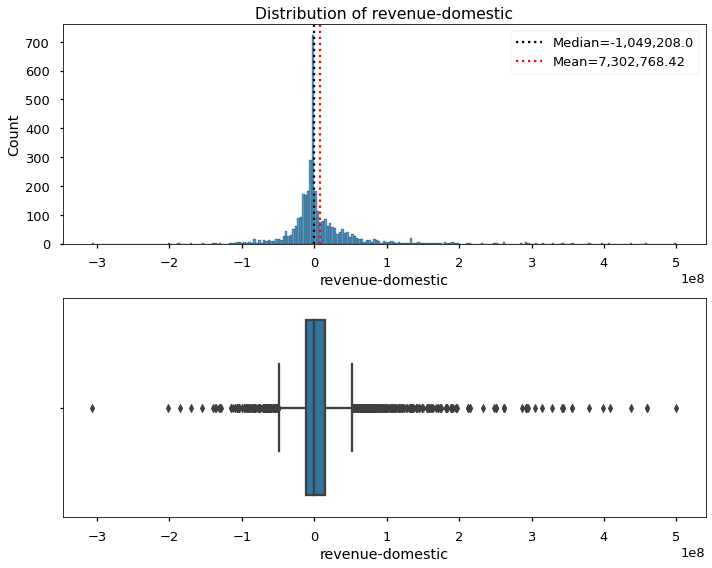

Skew = 3.09
Kurtosis = 20.18


In [142]:
fig,ax = plot_distribution(outlier_df,col='revenue-domestic')

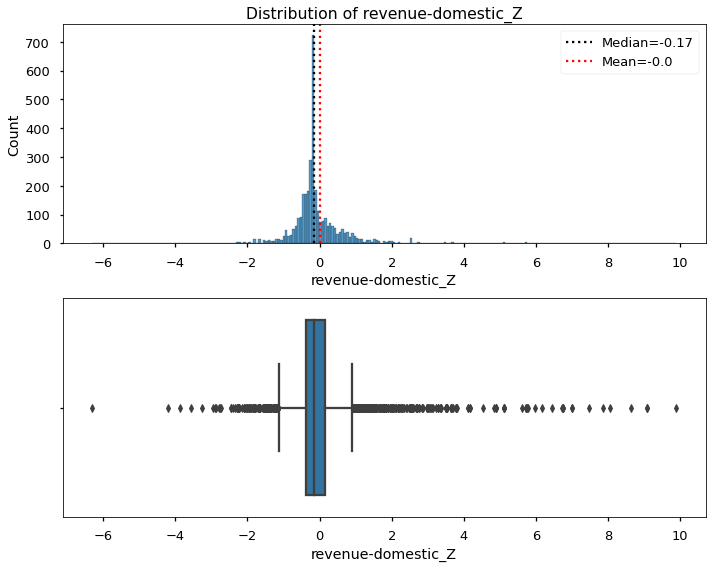

Skew = 3.09
Kurtosis = 20.18


In [143]:
fig,ax = plot_distribution(outlier_df,col='revenue-domestic_Z')

### Finding Outliers

- ~Two ways:
    - Absolute Z-scores > 3
    - IQR Rule

In [144]:
outlier_df['domestic_gross_outlier_Z'] = outlier_df['domestic_gross_Z'].abs()>3
outlier_df


,worldwide_gross,domestic_gross,revenue-domestic,revenue-worldwide,worldwide_gross_Z,domestic_gross_Z,revenue-domestic_Z,revenue-worldwide_Z,revenue-domestic-Z,domestic_gross_outlier_Z
0,"1,045,663,875.00","241,063,875.00","-169,536,125.00","635,063,875.00",5.11,2.89,-3.55,3.70,-3.55,False
1,"149,762,350.00","42,762,350.00","-307,237,650.00","-200,237,650.00",0.30,0.04,-6.32,-1.69,-6.32,False
2,"1,403,013,963.00","459,005,868.00","128,405,868.00","1,072,413,963.00",7.03,6.02,2.43,6.53,2.43,True
3,"2,048,134,200.00","678,815,482.00","378,815,482.00","1,748,134,200.00",10.49,9.18,7.46,10.89,7.46,True
4,"655,945,209.00","229,024,295.00","-70,975,705.00","355,945,209.00",3.02,2.71,-1.57,1.90,-1.57,False
...,...,...,...,...,...,...,...,...,...,...
3462,"138,711.00","138,711.00","128,711.00","128,711.00",-0.50,-0.57,-0.14,-0.39,-0.14,False
3463,"94,596.00","94,596.00","84,596.00","84,596.00",-0.50,-0.57,-0.14,-0.39,-0.14,False
3464,"4,584.00","4,584.00","-4,416.00","-4,416.00",-0.50,-0.57,-0.15,-0.39,-0.15,False
3465,0.00,0.00,"-7,000.00","-7,000.00",-0.50,-0.57,-0.15,-0.39,-0.15,False


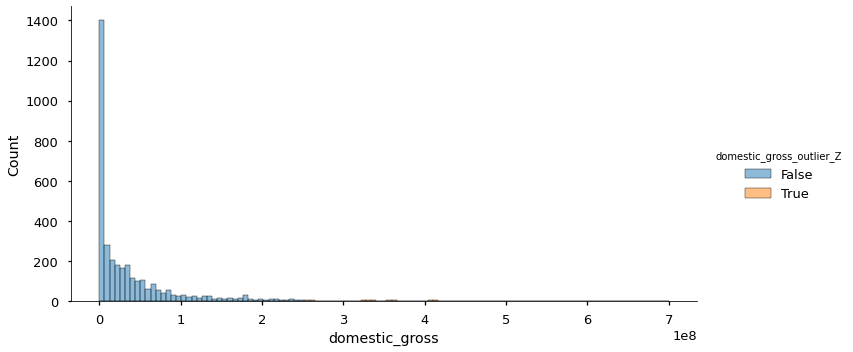

In [146]:
sns.displot(outlier_df, x='domestic_gross',aspect=2,hue='domestic_gross_outlier_Z')

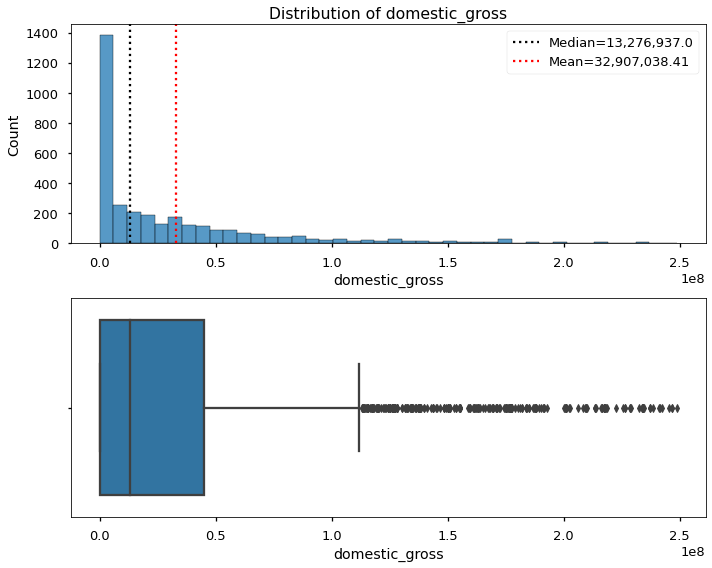

Skew = 2.07
Kurtosis = 4.32


(<Figure size 720x576 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Distribution of domestic_gross'}, xlabel='domestic_gross', ylabel='Count'>,
        <AxesSubplot:xlabel='domestic_gross'>], dtype=object))

In [148]:
plot_distribution(outlier_df[~outlier_df['domestic_gross_outlier_Z']])